In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv("SBIN.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (5306, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


In [5]:
df.drop(columns = 'Symbol', inplace = True)
df.drop(columns = 'Series', inplace = True)
df.drop(columns = 'Prev Close', inplace = True)
df.drop(columns = 'Turnover', inplace = True)
df.drop(columns = 'Trades', inplace = True)
df.drop(columns = 'Deliverable Volume', inplace = True)
df.drop(columns = '%Deliverble', inplace = True)

In [6]:
df.head()

,Date,Open,High,Low,Last,Close,VWAP,Volume
0,2000-01-03,236.00,243.65,234.25,243.65,243.65,240.83,2373228
1,2000-01-04,243.65,262.00,238.85,258.00,259.10,251.46,4495741
2,2000-01-05,249.00,264.70,245.00,249.05,248.45,252.35,3434058
3,2000-01-06,252.00,268.00,252.00,260.50,261.00,262.18,6658801
4,2000-01-07,261.50,279.90,255.00,279.00,273.30,269.02,7873985


In [7]:
df.iloc[0:, 5:6].head()

,Close
0,243.65
1,259.10
2,248.45
3,261.00
4,273.30


In [8]:
training_set = df.iloc[:4000, 5:6].values
test_set = df.iloc[4000:, 5:6].values

In [9]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 4000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [10]:
X_train.shape

(3940, 60, 1)

In [11]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
124/124 [==============================] - 18s 89ms/step - loss: 0.0098
Epoch 2/100
124/124 [==============================] - 11s 88ms/step - loss: 0.0044
Epoch 3/100
124/124 [==============================] - 11s 89ms/step - loss: 0.0040
Epoch 4/100
124/124 [==============================] - 11s 86ms/step - loss: 0.0033
Epoch 5/100
124/124 [==============================] - 11s 87ms/step - loss: 0.0029
Epoch 6/100
124/124 [==============================] - 11s 88ms/step - loss: 0.0030
Epoch 7/100
124/124 [==============================] - 11s 87ms/step - loss: 0.0025
Epoch 8/100
124/124 [==============================] - 11s 85ms/step - loss: 0.0024
Epoch 9/100
124/124 [==============================] - 11s 85ms/step - loss: 0.0022
Epoch 10/100
124/124 [==============================] - 11s 85ms/step - loss: 0.0021
Epoch 11/100
124/124 [==============================] - 11s 87ms/step - loss: 0.0021
Epoch 12/100
124/124 [==============================] - 10s 84ms/step - lo

124/124 [==============================] - 7s 60ms/step - loss: 9.3699e-04
Epoch 97/100
124/124 [==============================] - 7s 58ms/step - loss: 9.8966e-04
Epoch 98/100
124/124 [==============================] - 7s 57ms/step - loss: 8.8460e-04
Epoch 99/100
124/124 [==============================] - 7s 59ms/step - loss: 8.9916e-04
Epoch 100/100
124/124 [==============================] - 8s 62ms/step - loss: 8.6100e-04


In [12]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:4000, 4:5]
dataset_test = df.iloc[4000:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1366):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(1306, 60, 1)


In [13]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [14]:
dataset_train.shape

(4000, 1)

In [15]:
dataset_test.shape

(1306, 1)

In [16]:
predicted_stock_price.shape

(1306, 1)

In [20]:
r2_score(dataset_test.values,predicted_stock_price)

0.9493227491732701

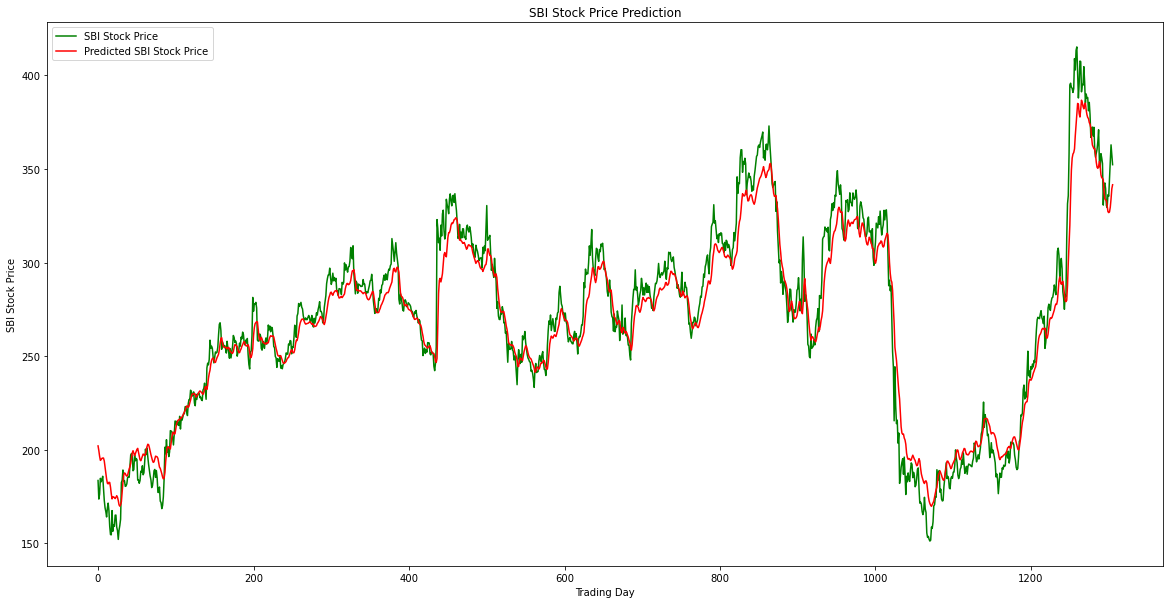

In [21]:
plt.figure(figsize=(20,10))
plt.plot(dataset_test.values, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()